### What is Polynomial Linear Regression?
 - In Simple Linear Regression, we use a straight line with formula Y = MX + C.
 - It was used to best fit the line to our dataset.
 - But in some datasets, it is hard to fit a straight line. Therefore we use a polynomial function of a curve to fit all the data points.

                        
<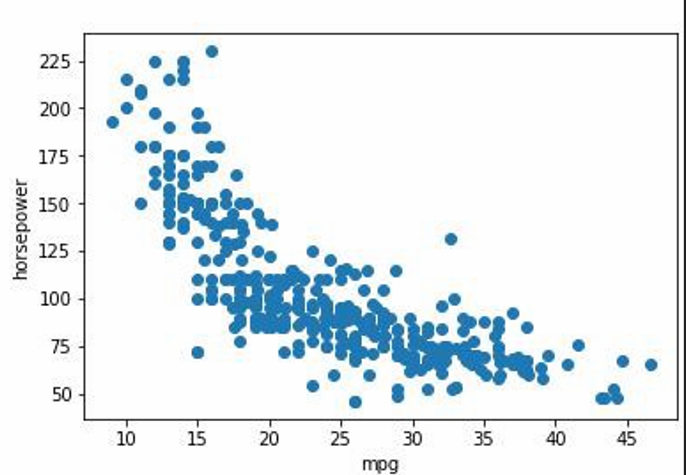img src='2.jpg'>
- if the dataset look like this type then we are doesnot use Linear Regression

- In this case we are use Polynomial regresion or other Type of regression techinque like (Decision tree,naive Bayes etc)

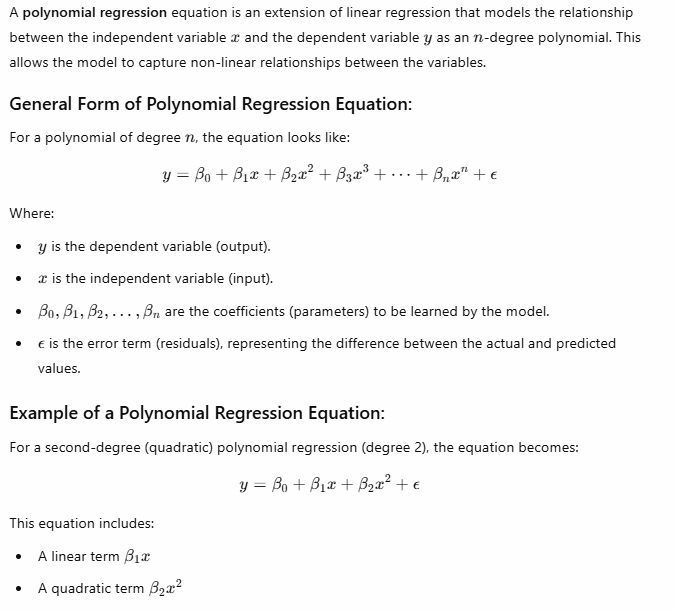

A non-linear relationship refers to a relationship between two variables where the change in one variable does not correspond to a constant or proportional change in the other variable.

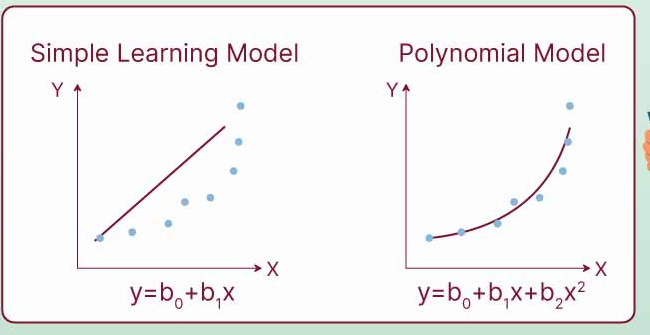

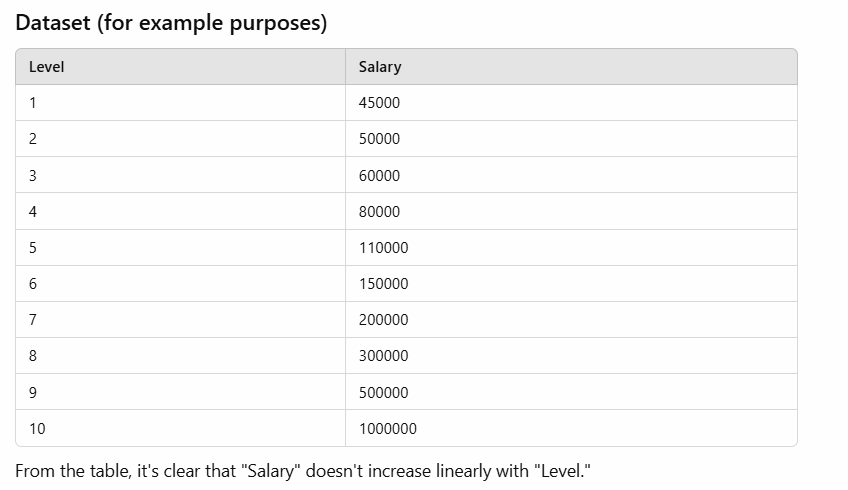

Real-Life Applications of Polynomial Regression :

**Housing Prices**: Predicts non-linear relationships between property features and prices.

**Economic Forecasting**: Models GDP, inflation, or unemployment trends.

**Weather Prediction**: Captures non-linear temperature or rainfall patterns.

**Agriculture:** Optimizes crop yield based on rainfall and fertilizer usage.


### Implementation of the polynomial linear regression in Python

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
dataset = pd.read_csv('/content/Position_Salaries.csv')

In [18]:
dataset.head(5)

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [20]:
dataset = dataset.drop(['Position'],axis=True)

In [21]:
dataset

,Level,Salary
0,1,45000
1,2,50000
2,3,60000
3,4,80000
4,5,110000
5,6,150000
6,7,200000
7,8,300000
8,9,500000
9,10,1000000


In [22]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Level   10 non-null     int64
 1   Salary  10 non-null     int64
dtypes: int64(2)
memory usage: 288.0 bytes


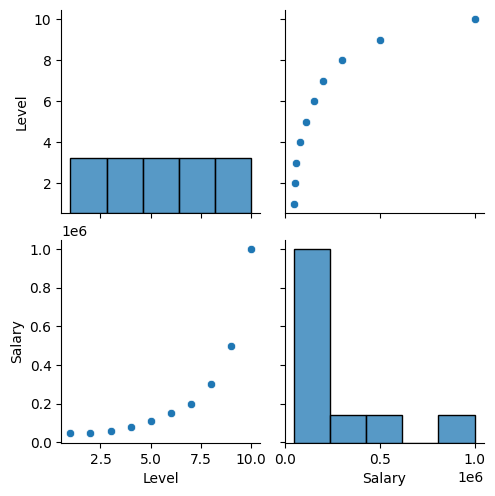

In [23]:
sns.pairplot(dataset)

### As see this plot is not linearly separable so here we use polynomial regression

Linearly separable refers to the concept where two classes or categories of data points can be separated by a straight line (in two dimensions), a plane (in three dimensions), or a hyperplane (in higher dimensions). In other words, there exists a linear decision boundary that can divide the data points of one class from another without any overlap.

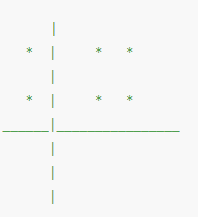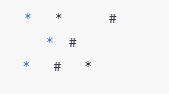

In [28]:
X = dataset.drop(['Salary'],axis=True)
y = dataset['Salary']

In [29]:
from sklearn.model_selection import train_test_split


In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [31]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((8, 1), (2, 1), (8,), (2,))

## ## Training the Linear Regression model

In [32]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

### Accuracy For Linear Regression

In [33]:
print("Training Accuracy :", lin_reg.score(X_train, y_train))
print("Testing Accuracy :", lin_reg.score(X_test, y_test))

Training Accuracy : 0.6366049276570868
Testing Accuracy : 0.8451346684575974


## Training the Polynomial Regression model

In [34]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X_train)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y_train)
X_poly_test = poly_reg.transform(X_test)

Transforming Features to Polynomial Form:
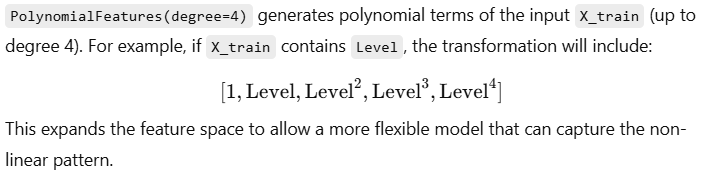


What Happens with fit_transform?
If X_train is a 2D array with a single feature, for example:

X_train = np.array( [ [1], [2], [3] ] )

from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X_train)
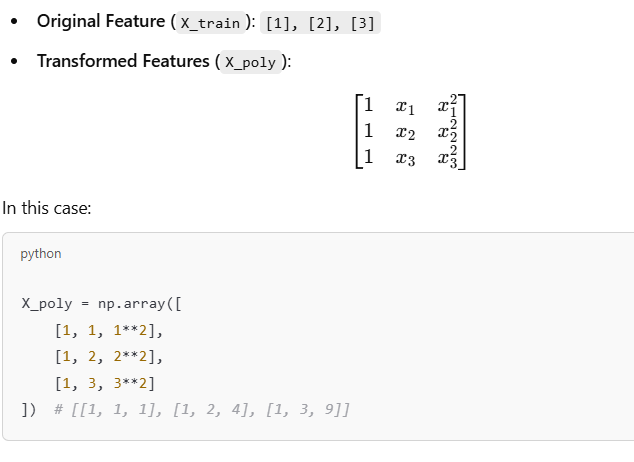

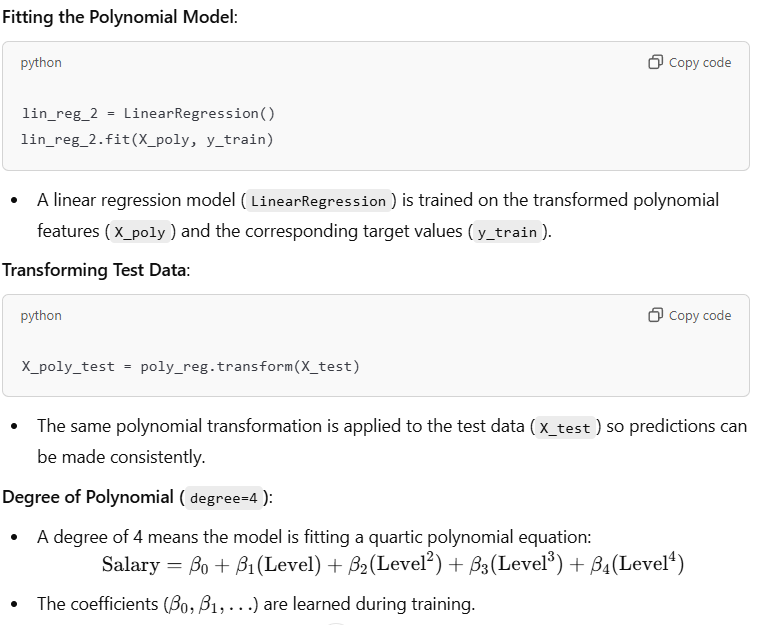

### Accuracy For Using Polynomial Regression

In [36]:
print("Training Accuracy :", lin_reg_2.score(X_poly, y_train))
print("Testing Accuracy :", lin_reg_2.score(X_poly_test, y_test))

Training Accuracy : 0.9995857211026754
Testing Accuracy : 0.9714666803842444


 - See in above that when i apply only Linear Regression On this data accuracy is not good, but When i apply polynomial regression then the accuracy is very high.
 ### - So i hope Now you understood when we apply Linear Regression and when we apply Polynomial Regression

### Graph For When We Use Linear Regression

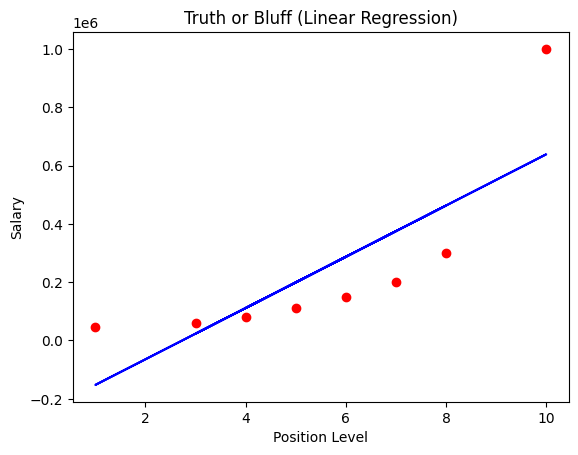

In [37]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, lin_reg.predict(X_train), color = 'blue')
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

### Graph For When We Use Polynomial Regression

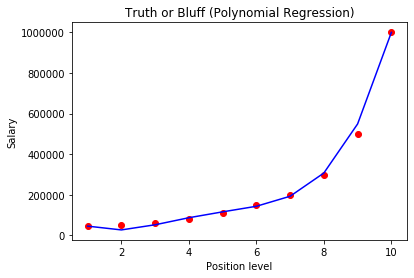

In [ ]:
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()